In [11]:
# -*- coding: utf-8 -*-
"""
Created on Mon Apr 15 19:43:04 2019

Updated on Wed Jan 29 10:18:09 2020

@author: created by Sowmya Myneni and updated by Dijiang Huang

Edited by Kai Chi on Thu, Jul 6, 2023
"""

########################################
# Part 1 - Data Pre-Processing
#######################################

# To load a dataset file in Python, you can use Pandas. Import pandas using the line below
import pandas as pd
# Import numpy to perform operations on the dataset
import numpy as np

# Variable Setup
# Available datasets: KDDTrain+.txt, KDDTest+.txt, etc. More read Data Set Introduction.html within the NSL-KDD dataset folder
# Type the training dataset file name in ''
#TrainingDataPath='NSL-KDD/'
#TrainingData='KDDTrain+_20Percent.txt'
# Batch Size
BatchSize=10
# Epohe Size
NumEpoch=10

print('--Load from saved files--')
# generate file names
attack_class_1 = list(map(int, input("(Training Dataset) Please enter the attack class(es) that you want from the below list:\n(Note that you can choose one or multiple classes, e.g., 1 3, and input 0 means nothing is chosen) \na1 -> DoS (Enter 1 for this selection)\na2 -> Probe (Enter 2 for this selection)\na3 -> U2R (Enter 3 for this selection)\na4 -> R2L (Enter 4 for this selection)\n\n").split()))
attack_class_2 = list(map(int, input("(Testing Dataset) Please enter the attack class(es) that you want from the below list:\n(Note that you can choose one or multiple classes, e.g., 1 3, and input 0 means nothing is chosen) \na1 -> DoS (Enter 1 for this selection)\na2 -> Probe (Enter 2 for this selection)\na3 -> U2R (Enter 3 for this selection)\na4 -> R2L (Enter 4 for this selection)\n\n").split()))
file_extension = '.csv' # .csv or .txt
trainingFileName="Training"
for i in range(len(attack_class_1)):
    trainingFileName = trainingFileName + "-a" + str(attack_class_1[i])
trainingFileName = trainingFileName + file_extension
testingFileName="Testing"
for i in range(len(attack_class_2)):
    testingFileName = testingFileName + "-a" + str(attack_class_2[i])
testingFileName = testingFileName + file_extension

# Import dataset.
# Dataset is given in TraningData variable You can replace it with the file 
# path such as “C:\Users\...\dataset.csv’. 
# The file can be a .txt as well. 
# If the dataset file has header, then keep header=0 otherwise use header=none
# reference: https://www.shanelynn.ie/select-pandas-dataframe-rows-and-columns-using-iloc-loc-and-ix/
#dataset = pd.read_csv(TrainingDataPath+TrainingData, header=None)

#X = dataset.iloc[:, 0:-2].values
#label_column = dataset.iloc[:, -2].values
#y = []
#for i in range(len(label_column)):
#    if label_column[i] == 'normal':
#        y.append(0)
#    else:
#        y.append(1)
ds1 = pd.read_csv(trainingFileName)
ds2 = pd.read_csv(testingFileName)
X_train = ds1.iloc[:,0:-2].values
X_test = ds2.iloc[:,0:-2].values
n1 = ds1.shape[0]
n2 = ds2.shape[0]
y_train = np.zeros(n1)
for i in range(n1):
    if ds1.iloc[i,-2]== 'normal':
        y_train[i] = 0
    else:
        y_train[i] = 1
y_test = np.zeros(n2)
for i in range(n2):
    if ds2.iloc[i,-2]== 'normal':
        y_test[i] = 0
    else:
        y_test[i] = 1

# Convert ist to array
#y = np.array(y)

# Encoding categorical data (convert letters/words in numbers)
# Reference: https://medium.com/@contactsunny/label-encoder-vs-one-hot-encoder-in-machine-learning-3fc273365621
# The following code work without warning in Python 3.6 or older. Newer versions suggest to use ColumnTransformer
'''
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
le = LabelEncoder()
X[:, 1] = le.fit_transform(X[:, 1])
X[:, 2] = le.fit_transform(X[:, 2])
X[:, 3] = le.fit_transform(X[:, 3])
onehotencoder = OneHotEncoder(categorical_features = [1, 2, 3])
X = onehotencoder.fit_transform(X).toarray()
'''
# The following code work Python 3.7 or newer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
ct = ColumnTransformer(
    [('one_hot_encoder', OneHotEncoder(), [1,2,3])],    # The column numbers to be transformed ([1, 2, 3] represents three columns to be transferred)
    remainder='passthrough'                         # Leave the rest of the columns untouched
)
#X = np.array(ct.fit_transform(X), dtype=float)
X = np.vstack((X_train, X_test))
X = np.array(ct.fit_transform(X), dtype=float)
X_train = X[0:n1,:]
X_test = X[n1:n1+n2,:]


# Splitting the dataset into the Training set and Test set (75% of data are used for training)
# reference: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)


# Perform feature scaling. For ANN you can use StandardScaler, for RNNs recommended is 
# MinMaxScaler. 
# referece: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
# https://scikit-learn.org/stable/modules/preprocessing.html
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)  # Scaling to the range [0,1]
X_test = sc.fit_transform(X_test)

print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)


--Load from saved files--
(Training Dataset) Please enter the attack class(es) that you want from the below list:
(Note that you can choose one or multiple classes, e.g., 1 3, and input 0 means nothing is chosen) 
a1 -> DoS (Enter 1 for this selection)
a2 -> Probe (Enter 2 for this selection)
a3 -> U2R (Enter 3 for this selection)
a4 -> R2L (Enter 4 for this selection)

1 3
(Testing Dataset) Please enter the attack class(es) that you want from the below list:
(Note that you can choose one or multiple classes, e.g., 1 3, and input 0 means nothing is chosen) 
a1 -> DoS (Enter 1 for this selection)
a2 -> Probe (Enter 2 for this selection)
a3 -> U2R (Enter 3 for this selection)
a4 -> R2L (Enter 4 for this selection)

1 3
(180634, 117) (180634,) (26928, 117) (26928,)


In [8]:
########################################
# Part 2: Building FNN
#######################################

# Importing the Keras libraries and packages
#import keras
from keras.models import Sequential
from keras.layers import Dense

# Initialising the ANN
# Reference: https://machinelearningmastery.com/tutorial-first-neural-network-python-keras/
classifier = Sequential()

# Adding the input layer and the first hidden layer, 6 nodes, input_dim specifies the number of variables
# rectified linear unit activation function relu, reference: https://machinelearningmastery.com/rectified-linear-activation-function-for-deep-learning-neural-networks/
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = len(X_train[0])))

# Adding the second hidden layer, 6 nodes
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))

# Adding the output layer, 1 node, 
# sigmoid on the output layer is to ensure the network output is between 0 and 1
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN, 
# Gradient descent algorithm “adam“, Reference: https://machinelearningmastery.com/adam-optimization-algorithm-for-deep-learning/
# This loss is for a binary classification problems and is defined in Keras as “binary_crossentropy“, Reference: https://machinelearningmastery.com/how-to-choose-loss-functions-when-training-deep-learning-neural-networks/
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
# Train the model so that it learns a good (or good enough) mapping of rows of input data to the output classification.
# add verbose=0 to turn off the progress report during the training
# To run the whole training dataset as one Batch, assign batch size: BatchSize=X_train.shape[0]
classifierHistory = classifier.fit(X_train, y_train, batch_size = BatchSize, epochs = NumEpoch)

# evaluate the keras model for the provided model and dataset
loss, accuracy = classifier.evaluate(X_train, y_train)
print('Print the loss and the accuracy of the model on the dataset')
print('Loss [0,1]: %.4f' % (loss), 'Accuracy [0,1]: %.4f' % (accuracy))

NameError: name 'y_train' is not defined

In [33]:
########################################
# Part 3 - Making predictions and evaluating the model
#######################################

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.9)   # y_pred is 0 if less than 0.9 or equal to 0.9, y_pred is 1 if it is greater than 0.9
# summarize the first 5 cases
#for i in range(5):
#	print('%s => %d (expected %d)' % (X_test[i].tolist(), y_pred[i], y_test[i]))

# Making the Confusion Matrix
# [TN, FP ]
# [FN, TP ]
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print('Print the Confusion Matrix:')
print('[ TN, FP ]')
print('[ FN, TP ]=')
print(cm)
print((y_test==y_pred).mean())
print((y_test==1).mean())
print((y_test==0).mean())

693/693 [==============================] - 0s 342us/step
Print the Confusion Matrix:
[ TN, FP ]
[ FN, TP ]=
[[18528   894]
 [  872  1852]]
0.783506114675586
0.1230018965050122
0.8769981034949879


Plot the accuracy


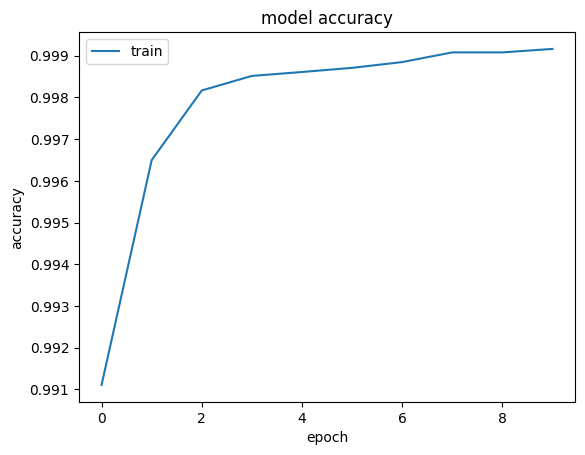

Plot the loss


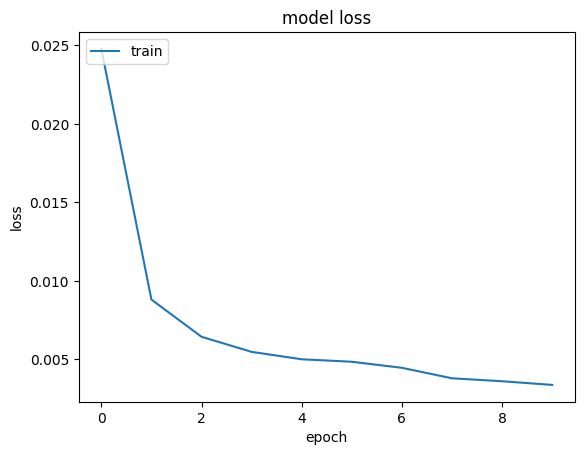

In [34]:
########################################
# Part 4 - Visualizing
#######################################

# Import matplot lib libraries for plotting the figures. 
import matplotlib.pyplot as plt

# You can plot the accuracy
print('Plot the accuracy')
# Keras 2.2.4 recognizes 'acc' and 2.3.1 recognizes 'accuracy'
# use the command python -c 'import keras; print(keras.__version__)' on MAC or Linux to check Keras' version
plt.plot(classifierHistory.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.savefig('accuracy_sample.png')
plt.show()

# You can plot history for loss
print('Plot the loss')
plt.plot(classifierHistory.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.savefig('loss_sample.png')
plt.show()
